# 7COM1074 Applied Data Science and Analytics
# Coursework 1 - Visualisation

Provided is this jupyter notebook. Contained are all instructions necessary to complete the assignment.

This assignment is weighted with 20% of the total marks you can score in this module.


## Marking criteria
A total of 100 marks can be obtained.

20 marks will be awarded to a notebook that is valid and free of coding errors. That is, it should load without error on a university machine, and all cells can be run without any errors. *Hint:* Check via "Kernel" -> "Restart & Run All" in the menu bar. 

The remaining 80 marks will awarded for solving the 9 tasks, and distibuted as indicated.


## What to submit
You will have to submit 5 files:
1. This notebook, completed as instructed, in .ipynb file format;
2. This notebook, completed as instucted, in .html format;
3. 1 PCA scatter plot figure, PNG format;
4. 1 PCA components figure, PNG format;
5. 1 PCA scree plot figure, SVG format.

### Task 1 - Load the data (No marks)
Execute the provided code. It will load the data and create a data frame. 

Notice that it stores the `target` variable from the data set as `house_prices`. You will need that later.

In [2]:
import pandas as pd
import sklearn.datasets as data
import matplotlib.pyplot as plt
%matplotlib inline

boston = data.load_boston()
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
house_prices = boston['target']
boston_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

### Task 2 - Identify categorical features (4 marks)
The cell below prints the description of the data set. Read this description and identify the feature that is  categorical. In the text cell provided, specify the name of the categorical feature and justify why you decided it is categorical.

**Remark**: The 'MEDV' feature is mentioned in the attribute information but it is not present in the features. The reason is that the 'MEDV' feature is the target variable. 

In [3]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Answer task 2:** The categorical feature in this dataset is: CHAS. It is categorical because it divides the data into two groups which are tract bounds river (1) or otherwise (0). 



### Task 3 - remove categorical feature - (4 marks)
Use the `drop` function ot remove the categorical feature from the DataFrame.

In [4]:
# add code for task 3 here
boston_df.drop(['CHAS'], axis=1)

CRIM    ZN  INDUS    NOX     RM    AGE     DIS   RAD    TAX  PTRATIO  \
0     0.00632  18.0   2.31  0.538  6.575   65.2  4.0900   1.0  296.0     15.3   
1     0.02731   0.0   7.07  0.469  6.421   78.9  4.9671   2.0  242.0     17.8   
2     0.02729   0.0   7.07  0.469  7.185   61.1  4.9671   2.0  242.0     17.8   
3     0.03237   0.0   2.18  0.458  6.998   45.8  6.0622   3.0  222.0     18.7   
4     0.06905   0.0   2.18  0.458  7.147   54.2  6.0622   3.0  222.0     18.7   
5     0.02985   0.0   2.18  0.458  6.430   58.7  6.0622   3.0  222.0     18.7   
6     0.08829  12.5   7.87  0.524  6.012   66.6  5.5605   5.0  311.0     15.2   
7     0.14455  12.5   7.87  0.524  6.172   96.1  5.9505   5.0  311.0     15.2   
8     0.21124  12.5   7.87  0.524  5.631  100.0  6.0821   5.0  311.0     15.2   
9     0.17004  12.5   7.87  0.524  6.004   85.9  6.5921   5.0  311.0     15.2   
10    0.22489  12.5   7.87  0.524  6.377   94.3  6.3467   5.0  311.0     15.2   
11    0.11747  12.5   7.87  0.524  6.009   82.9  6.2267   5.0  311.0     15.2   
12    0.09378  12.5   7.87  0.524  5.889   39.0  5.4509   5.0  311.0     15.2   
13    0.62976   0.0   8.14  0.538  5.949   61.8  4.7075   4.0  307.0     21.0   
14    0.63796   0.0   8.14  0.538  6.096   84.5  4.4619   4.0  307.0     21.0   
15    0.62739   0.0   8.14  0.538  5.834   56.5  4.4986   4.0  307.0     21.0   
16    1.05393   0.0   8.14  0.538  5.935   29.3  4.4986   4.0  307.0     21.0   
17    0.78420   0.0   8.14  0.538  5.990   81.7  4.2579   4.0  307.0     21.0   
18    0.80271   0.0   8.14  0.538  5.456   36.6  3.7965   4.0  307.0     21.0   
19    0.72580   0.0   8.14  0.538  5.727   69.5  3.7965   4.0  307.0     21.0   
20    1.25179   0.0   8.14  0.538  5.570   98.1  3.7979   4.0  307.0     21.0   
21    0.85204   0.0   8.14  0.538  5.965   89.2  4.0123   4.0  307.0     21.0   
22    1.23247   0.0   8.14  0.538  6.142   91.7  3.9769   4.0  307.0     21.0   
23    0.98843   0.0   8.14  0.538  5.813  100.0  4.0952   4.0  307.0     21.0   
24    0.75026   0.0   8.14  0.538  5.924   94.1  4.3996   4.0  307.0     21.0   
25    0.84054   0.0   8.14  0.538  5.599   85.7  4.4546   4.0  307.0     21.0   
26    0.67191   0.0   8.14  0.538  5.813   90.3  4.6820   4.0  307.0     21.0   
27    0.95577   0.0   8.14  0.538  6.047   88.8  4.4534   4.0  307.0     21.0   
28    0.77299   0.0   8.14  0.538  6.495   94.4  4.4547   4.0  307.0     21.0   
29    1.00245   0.0   8.14  0.538  6.674   87.3  4.2390   4.0  307.0     21.0   
..        ...   ...    ...    ...    ...    ...     ...   ...    ...      ...   
476   4.87141   0.0  18.10  0.614  6.484   93.6  2.3053  24.0  666.0     20.2   
477  15.02340   0.0  18.10  0.614  5.304   97.3  2.1007  24.0  666.0     20.2   
478  10.23300   0.0  18.10  0.614  6.185   96.7  2.1705  24.0  666.0     20.2   
479  14.33370   0.0  18.10  0.614  6.229   88.0  1.9512  24.0  666.0     20.2   
480   5.82401   0.0  18.10  0.532  6.242   64.7  3.4242  24.0  666.0     20.2   
481   5.70818   0.0  18.10  0.532  6.750   74.9  3.3317  24.0  666.0     20.2   
482   5.73116   0.0  18.10  0.532  7.061   77.0  3.4106  24.0  666.0     20.2   
483   2.81838   0.0  18.10  0.532  5.762   40.3  4.0983  24.0  666.0     20.2   
484   2.37857   0.0  18.10  0.583  5.871   41.9  3.7240  24.0  666.0     20.2   
485   3.67367   0.0  18.10  0.583  6.312   51.9  3.9917  24.0  666.0     20.2   
486   5.69175   0.0  18.10  0.583  6.114   79.8  3.5459  24.0  666.0     20.2   
487   4.83567   0.0  18.10  0.583  5.905   53.2  3.1523  24.0  666.0     20.2   
488   0.15086   0.0  27.74  0.609  5.454   92.7  1.8209   4.0  711.0     20.1   
489   0.18337   0.0  27.74  0.609  5.414   98.3  1.7554   4.0  711.0     20.1   
490   0.20746   0.0  27.74  0.609  5.093   98.0  1.8226   4.0  711.0     20.1   
491   0.10574   0.0  27.74  0.609  5.983   98.8  1.8681   4.0  711.0     20.1   
492   0.11132   0.0  27.74  0.609  5.983   83.5  2.1099   4.0  711.0     20.1   
493   0.17331   0.0   9.69  0.585  5.707

### Task 4 - Scaling the data (6 marks)
Scale the features to zero mean and unit variance using `sklearn.preprocessing.StandardScaler`.

In [5]:
# add code for task 4 here
from sklearn import preprocessing as pp
scaler = pp.StandardScaler()
scaler.fit(boston_df)
boston_df_norm = scaler.transform(boston_df) 



### Task 5 - Principal component analysis (PCA) (6 marks)
Perform a PCA of the scaled data set using `sklearn.decomposition.PCA`. 

In [6]:
# add code for task 5 here
from sklearn.decomposition import PCA

pca = PCA()

boston_df_pca = pca.fit_transform(boston_df_norm)

### Task 6 - Scatter plot (24 marks)
**6.1.** Make a scatter plot of the first 2 principal components in a figure. The figure should be 6 inches wide, 4.5 inches tall (4 marks). 

**6.2** Set appropriate labels for the x- and y-axis (4 marks).

**6.3** Use the `house_prices` variable to color the scatter plot dots by house price. Choose a suitable color map. Add a colorbar() to the figure. Set the label of the colorbar according to the variable it maps (4 marks).

**6.4** Justify your choice of colormap in the provided text cell (1-2 sentences, 4 marks).

**6.5** Save scatter plot as PNG with 150 dpi (4 marks).

**6.6** Verify that the saved file has the correct size (6 x 4.5 inches) and upload it as part of your submission (4 marks).

Text(0.5, 1.0, 'PC1 against PC2')

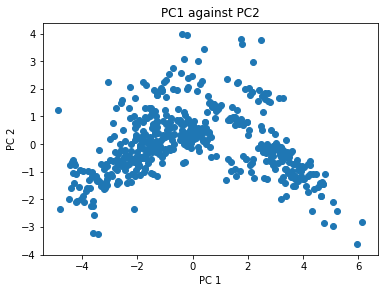

In [7]:
# add code for task 6 here
#6.1
fig = plt.figure(figsize=(6,4.5))
ax = fig.gca()
ax.scatter(boston_df_pca[:,0], boston_df_pca[:,1])
ax.axis('scaled')

#6.2
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('PC1 against PC2')

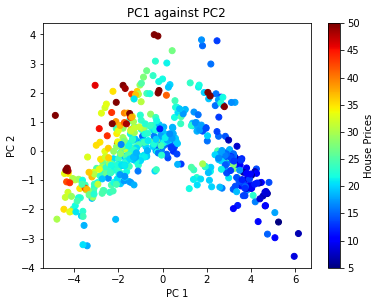

In [8]:
#6.3
f = plt.figure(figsize=(6,4.5))
ax = f.gca() # instead of plt.gca()
dots = ax.scatter(boston_df_pca[:,0], boston_df_pca[:,1],
           c= boston['target'],   
           cmap='jet')
# adding colorbar
plt.colorbar(dots, label='House Prices')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('PC1 against PC2')

#6.5
plt.savefig(fname = 'Task6-PC1-And-PC2-Kamran-Nagi-14169841.png', dpi= 150)

**Answer to 6.4**: This colourmap has a wide range of hue and brightness and follows natural patterns of colour therefore it is easier to distinguish higher house prices with lower. Natural colours also tend to be visually appealing.

### Task 7 - PCA components (24 marks)
**7.1** Plot PCA components matrix as image, size 7 inches wide, 5 inches tall (4 marks). 

**7.2** Choose a suitable colormap, add a colorbar to the figure, add a suitable label to the colorbar (4 marks).

**7.3** Justify your choice of colormap in the provided text cell (1-2 sentences, 4 marks).

**7.4** Use the dataset's feature names as x-tick-labels, rotated by 90 degrees (4 marks).

**7.5** Save as PNG with 75 dpi (4 marks).

**7.6** Verify that the saved file has the correct size (7 x 5 inches) and upload it as part of your submission (4 marks).

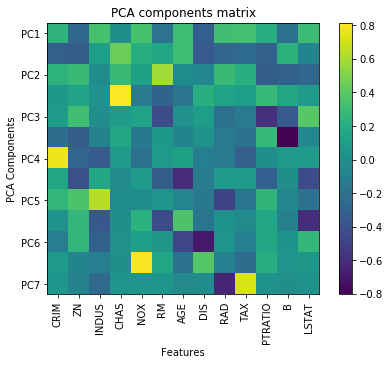

In [9]:
# add code for task 7 here

#7.1
comps = pca.components_
plt.figure(figsize=(7,5))
ax = plt.gca()
img = ax.imshow(comps)
plt.colorbar(img)
t = ax.set_yticklabels(["PC{}".format(i) for i in range(13)])
ax.set_xticks([0,1,2,3, 4, 5, 6, 7, 8, 9,10, 11, 12])
t = ax.set_xticklabels(boston['feature_names'])
plt.xticks(rotation=90)
ax.set_xlabel('Features')
ax.set_ylabel('PCA Components')
ax.set_title('PCA components matrix')

plt.savefig(fname = 'Task7-PCA-Components-Matrix-Kamran-Nagi-14169841.png', dpi= 75)

**Answer to 7.3:** From this colourmap we can clearly see a gradient pallett which makes reading the matrix alot easier. Immediately after looking at the figure we can see that yellow and its shades have more weight than the blue and it's shades. This color scheme makes comprehending the visualisation alot easier.

### Task 8 - Scree plot (12 marks)
**8.1** Make scree plot with grey dashed lines and black round markers, 5 inches wide, 4 inches tall. Label the axes appropriately. (4 marks).

**8.2** Save scree plot as svg (4 marks).

**8.3** Verify that the saved file has the correct size (5x4 inches) and upload it as part of your submission (4 marks).

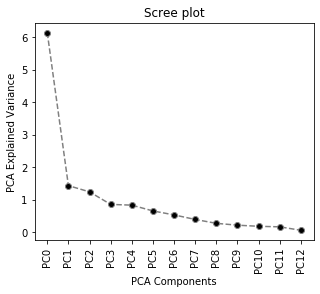

In [10]:
# add code for task 8 here
plt.figure(figsize=(5,4))
ax = plt.gca()
expl_var = pca.explained_variance_
ax.plot(expl_var, marker='o', linestyle='--', color='grey', markerfacecolor='black')
ax.set_xticks([0,1,2,3, 4, 5, 6, 7, 8, 9,10, 11, 12])
ax.set_xticklabels(["PC{}".format(i) for i in range(13)])
plt.xticks(rotation=90)
ax.set_ylabel('PCA Explained Variance')
ax.set_xlabel('PCA Components')
ax.set_title('Scree plot')

plt.savefig('Task8-Scree-plot-Kamran-Nagi-14169841.svg')